# Detrending fundamentals

This notebook demonstrates how to use `detrend1d` to remove a single trend that spans an entire 1D time series.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import detrend1d as dtr

<br>
<br>

# Part 1:  Linear trends

Define a linear trend as:

$$y(t) = b_0 + b_1 t$$

where:

- $t$ = time
- $y(t)$ = dependent or observed variable value at time $t$
- $b_0$ = intercept
- $b_1$ = slope

An observed time series $y(t)$ has a true trend if $b_1\ne0$.

The computational goals of "detrending" for this case are:

1. To estimate $b_0$ and $b_1$ given the observed values $y(t)$
2. To calculate the detrended time series $y_d(t)$, defined as:

$$y_d(t) = y(t) - (b_0 + b_1 t)$$

<br>
<br>

Let's first create a noisy dataset with a linear trend.

<br>
<br>

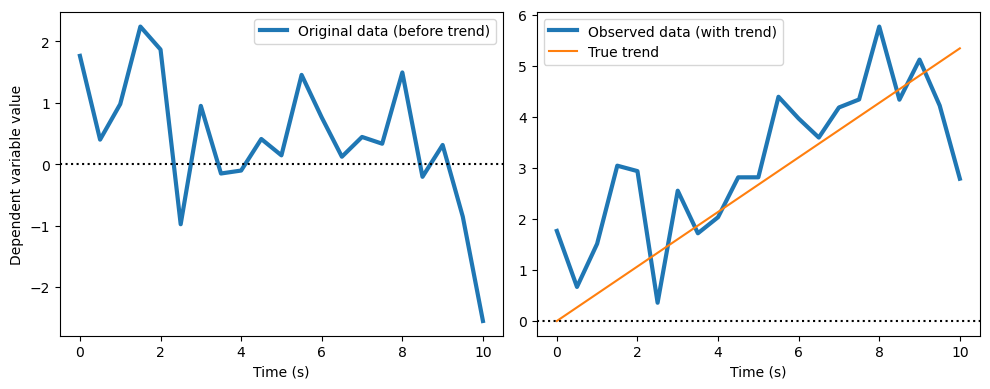

In [2]:
np.random.seed(0)
n       = 21
t       = np.linspace(0, 10, n) # time

y_orig  = np.random.randn( n )  # original (random) dataset
b0,b1   = 0, 0.534             # intercept, slope
y_trend = b0 + b1*t            # true trend
y       = y_orig + y_trend     # observed data


# plot:
fig,axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
ax0,ax1 = axs
ax0.plot(t, y_orig, lw=3, label='Original data (before trend)')
ax0.axhline(0, color='k', ls=':')
ax0.legend()
ax1.plot(t, y, lw=3, label='Observed data (with trend)')
ax1.plot(t, y_trend, label='True trend')
ax1.axhline(0, color='k', ls=':')
ax1.legend()
[ax.set_xlabel('Time (s)')  for ax in axs]
ax0.set_ylabel('Dependent variable value')
plt.show()

<br>
<br>

## Detrending using `detrend1d`

The `detrend1d.detrend` function can be used to both estimate the true trend ($b_0$, $b_1$) and remove it.


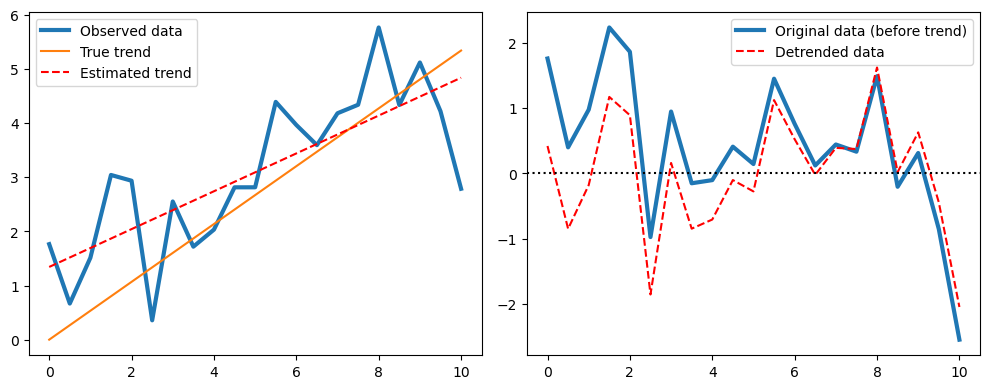

In [3]:
yd,fit  = dtr.detrend(t, y, trend='linear')


fig,axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
ax0,ax1 = axs
ax0.plot(t, y, lw=3, label='Observed data')
ax0.plot(t, y_trend, label='True trend')
fit.plot( ax=ax0, ls='--', color='r', label='Estimated trend' )
ax0.legend()
ax1.plot(t, y_orig, lw=3, label='Original data (before trend)')
ax1.plot(t, yd, ls='--', color='r', label='Detrended data')
ax1.axhline(0, color='k', ls=':')
ax1.legend()
plt.show()

Here `yd` is a numpy array containing the detrended time series:






In [4]:
print( type(yd) )
print( yd.shape )

<class 'numpy.ndarray'>
(21,)


The other output from `detrend` is `fit`, which contains various attributes relevant to the trend calculation:

In [5]:
print( fit )

Fit
   trend_type:  linear
   beta:        [1.34307   0.3495165]
   t:          (21,) time array
   y:          (21,) dependent variable array
   yhat:       (21,) fitted values array



The attributes are:

- `trend_type` = type of fitted trend
- `beta` = estimated trend parameters (b0 and b1 in this case)
- `t` = original time vector
- `y` = original dependent variable array
- `yhat` = fitted values at times `t` (straight line in this case)

If required the attributes can be accessed using "dot" notation:

In [6]:
print( 'Fitted parameters:')
print( fit.beta )

print()

print('Fitted values:')
print( np.around(fit.yhat, 3) )

Fitted parameters:
[1.34307   0.3495165]

Fitted values:
[1.343 1.518 1.693 1.867 2.042 2.217 2.392 2.566 2.741 2.916 3.091 3.265
 3.44  3.615 3.79  3.964 4.139 4.314 4.489 4.663 4.838]


## Comparison with `scipy.signal.detrend`

From the figure below it is clear that `detrend1d.detrend` yields the same results as `scipy.signal.detrend`.

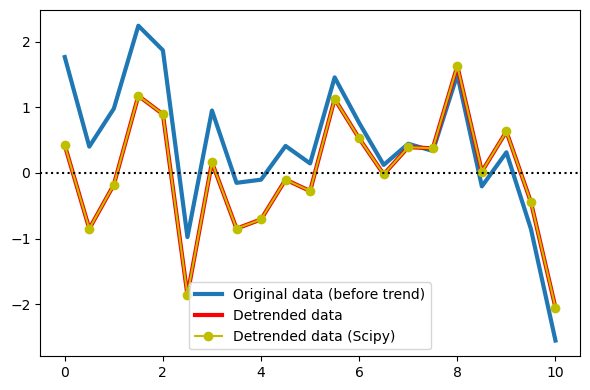

In [7]:
from scipy.signal import detrend as scipy_detrend

ys  = scipy_detrend(y)



fig = plt.figure(figsize=(6, 4), tight_layout=True)
ax  = plt.axes()
ax.plot(t, y_orig, lw=3, label='Original data (before trend)')
ax.plot(t, yd, ls='-', lw=3, color='r', label='Detrended data')
ax.plot(t, ys, 'o-', color='y', lw=1.5, label='Detrended data (Scipy)')
ax.axhline(0, color='k', ls=':')
ax.legend()
plt.show()

## More data points yields better detrend estimates

Repeating the example above with more data points shows that increasing the amount of data tends to improve both the true trend estimate and the detrending results.

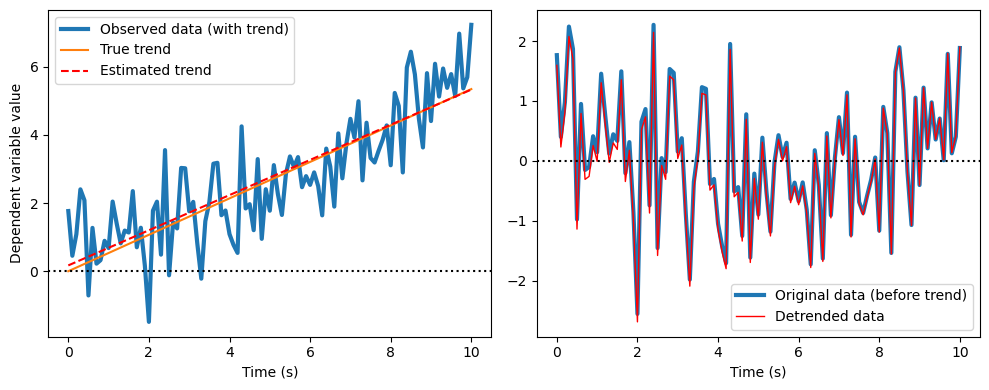

In [8]:
np.random.seed(0)
n       = 101
t       = np.linspace(0, 10, n) # time

y_orig  = np.random.randn( n )  # original (random) dataset
b0,b1   = 0, 0.534             # intercept, slope
y_trend = b0 + b1*t            # true trend
y       = y_orig + y_trend     # observed data
yd,fit  = dtr.detrend(t, y, trend='linear')

fig,axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
ax0,ax1 = axs

ax0.plot(t, y, lw=3, label='Observed data (with trend)')
ax0.plot(t, y_trend, label='True trend')
fit.plot(ax=ax0, color='r', ls='--', label='Estimated trend')
ax0.axhline(0, color='k', ls=':')
ax0.legend()

ax1.plot(t, y_orig, lw=3, label='Original data (before trend)')
ax1.plot(t, yd, ls='-', lw=1, color='r', label='Detrended data')
ax1.axhline(0, color='k', ls=':')
ax1.legend()

[ax.set_xlabel('Time (s)')  for ax in axs]
ax0.set_ylabel('Dependent variable value')
plt.show()

## Detrending cyclical data

When the data are cyclical like in the sine wave example below, improving the trend estimate generally requires an increase in the number of *cycles*.

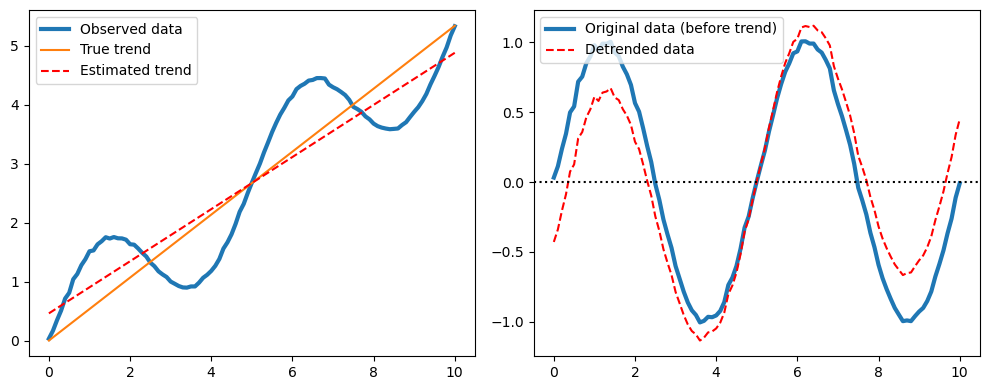

In [9]:
np.random.seed(1)

n       = 101
y_orig  = np.sin( np.linspace(0, 4*np.pi, n) ) + 0.02 * np.random.randn( n )  # original (random) dataset
y       = y_orig + y_trend                   # observed data
yd,fit  = dtr.detrend(t, y, trend='linear')  # detrended data


fig,axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
ax0,ax1 = axs
ax0.plot(t, y, lw=3, label='Observed data')
ax0.plot(t, y_trend, label='True trend')
fit.plot( ax=ax0, ls='--', color='r', label='Estimated trend' )
ax0.legend()

ax1.plot(t, y_orig, lw=3, label='Original data (before trend)')
ax1.plot(t, yd, ls='--', color='r', label='Detrended data')
ax1.axhline(0, color='k', ls=':')
ax1.legend()
plt.show()

<br>

Adding more *cycles* improves the results, even when the number of data points is the same...

<br>

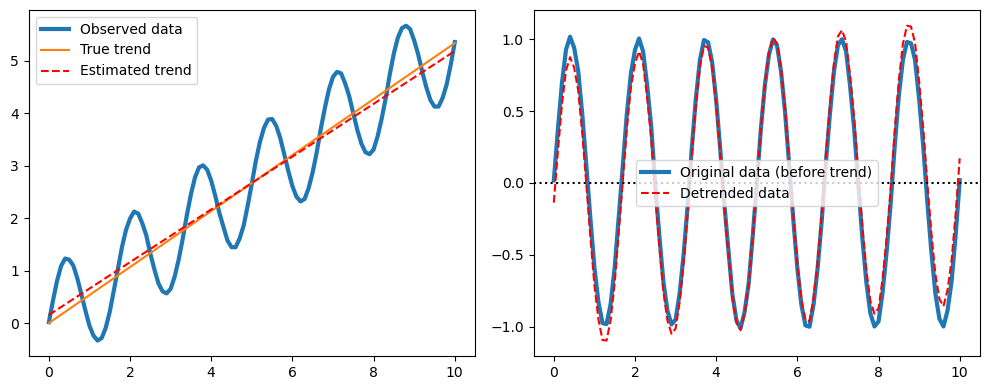

In [10]:
np.random.seed(0)
n       = 101
t       = np.linspace(0, 10, n) # time
y_orig  = np.sin( np.linspace(0, 12*np.pi, n) ) + 0.01 * np.random.randn( n )  # original (random) dataset
b0,b1   = 0, 0.534             # intercept, slope
y_trend = b0 + b1*t            # true trend
y       = y_orig + y_trend     # observed data


yd,fit  = dtr.detrend(t, y, trend='linear')


fig,axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
ax0,ax1 = axs
ax0.plot(t, y, lw=3, label='Observed data')
ax0.plot(t, y_trend, label='True trend')
fit.plot( ax=ax0, ls='--', color='r', label='Estimated trend' )
ax0.legend()
ax1.plot(t, y_orig, lw=3, label='Original data (before trend)')
ax1.plot(t, yd, ls='--', color='r', label='Detrended data')
ax1.axhline(0, color='k', ls=':')
ax1.legend()
plt.show()

## Fixed intercept

Like `scipy.signal.detrend`, by default `detrend1d.detrend` regard both parameters $b_0$ and $b_1$ as unknowns, and both are estimated in a least-squares manner. However, in some cases the intercept $b_0$ may be known, and in other cases it may be desireable to control $b_0$. While `scipy.signal.detrend` does not directly offer $b_0$ control, this parameter can be easily fixed in `detrend1d.detrend` via the keyword argument `intercept`:


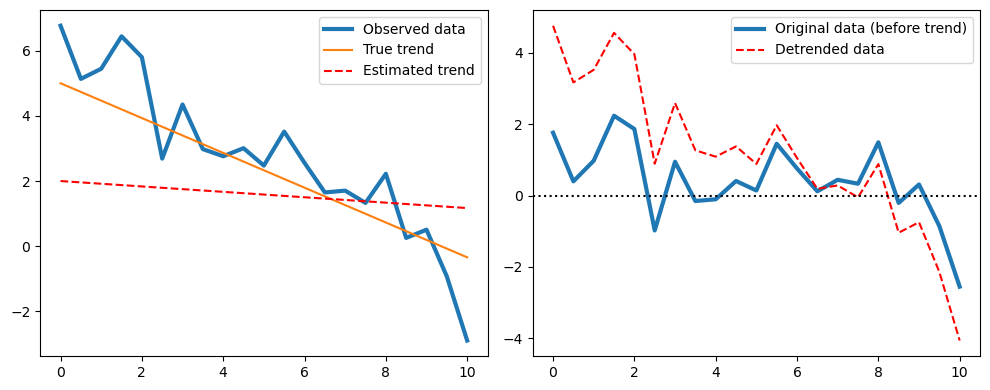

In [11]:
np.random.seed(0)
n       = 21
t       = np.linspace(0, 10, n) # time

y_orig  = np.random.randn( n )  # original (random) dataset
b0,b1   = 5, -0.534             # intercept, slope
y_trend = b0 + b1*t             # true trend
y       = y_orig + y_trend      # observed data


yd,fit  = dtr.detrend(t, y, trend='linear', intercept=2)  # fix the intercept as b0=2


fig,axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
ax0,ax1 = axs
ax0.plot(t, y, lw=3, label='Observed data')
ax0.plot(t, y_trend, label='True trend')
fit.plot( ax=ax0, ls='--', color='r', label='Estimated trend' )
ax0.legend()
ax1.plot(t, y_orig, lw=3, label='Original data (before trend)')
ax1.plot(t, yd, ls='--', color='r', label='Detrended data')
ax1.axhline(0, color='k', ls=':')
ax1.legend()
plt.show()

<br>
<br>
<br>

# Part 2: Nonlinear (linear-in-the-parameters) trends

`detrend1d` additionally implements three nonlinear models that can be used during detrendring:

- `"exp"` = exponential
- `"poly2"` = second-degree polynomial
- `"poly3"` = third-degree polynomial

The equations for each trend are, respectively:


$$y(t) = b_0 + b_1 t + b_2 e^t$$

$$y(t) = b_0 + b_1 t + b_2 t^2$$

$$y(t) = b_0 + b_1 t + b_2 t^2 + b_3 t^3$$


<br>
<br>

Let's create three datasets with these trends:

<br>
<br>

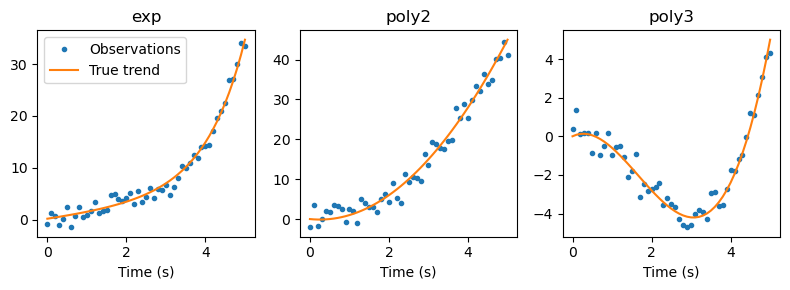

In [12]:
np.random.seed(123)
n           = 51
t           = np.linspace(0, 5, n)

# exponential
b0,b1,b2    = 0, 1, 0.2
ytrend0     = b0 + (b1 * t) + (b2 * np.exp(t))
y0          = ytrend0 + np.random.randn(n)

# poly2
b0,b1,b2    = 0, -1, 2
ytrend1     = b0 + (b1 * t) + (b2 * t**2)
y1          = ytrend1 + 2 * np.random.randn(n)

# poly3
b0,b1,b2,b3 = 0, 1, -2, 0.4
ytrend2     = b0 + (b1 * t) + (b2 * t**2) + (b3 * t**3)
y2          = ytrend2 + 0.5 * np.random.randn(n)


# plot:
fig,axs     = plt.subplots(1, 3, figsize=(8,3), tight_layout=True)
labels      = ['exp', 'poly2', 'poly3']
for ax,y,ytrend,label in zip(axs, [y0,y1,y2], [ytrend0,ytrend1,ytrend2], labels):
    ax.plot(t, y, 'o', ms=3, label='Observations')
    ax.plot(t, ytrend, label='True trend')
    ax.set_title(label)
    ax.set_xlabel('Time (s)')
axs[0].legend()
plt.show()



<br>
<br>

Next let's estimate the trends:

<br>
<br>

Estimated parameters:  [0.138 0.814 0.21 ]
Estimated parameters:  [ 1.055 -1.588  2.059]
Estimated parameters:  [ 0.369  0.243 -1.632  0.353]


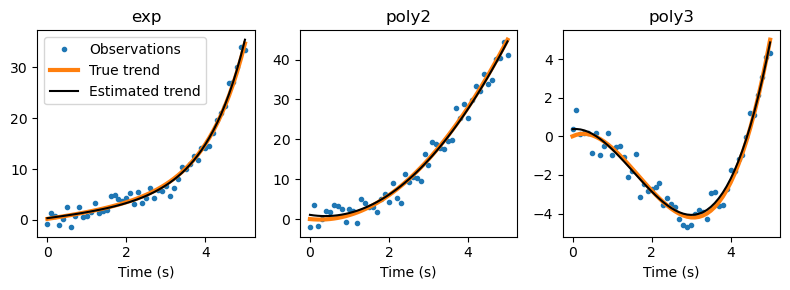

In [13]:
yd0,fit0   = dtr.detrend(t, y0, trend='exp')
yd1,fit1   = dtr.detrend(t, y1, trend='poly2')
yd2,fit2   = dtr.detrend(t, y2, trend='poly3')


# plot:
fig,axs    = plt.subplots(1, 3, figsize=(8,3), tight_layout=True)
labels     = ['exp', 'poly2', 'poly3']
for ax,y,ytrend,fit,label in zip(axs, [y0,y1,y2], [ytrend0,ytrend1,ytrend2], [fit0,fit1,fit2], labels):
    ax.plot(t, y, 'o', ms=3, label='Observations')
    ax.plot(t, ytrend, lw=3, label='True trend')
    fit.plot( ax=ax, color='k', label='Estimated trend')
    ax.set_title(label)
    ax.set_xlabel('Time (s)')
    print( f'Estimated parameters:  {np.around(fit.beta, 3)}')
axs[0].legend()
plt.show()


<br>
<br>

Finally let's view the detrended results:

<br>
<br>


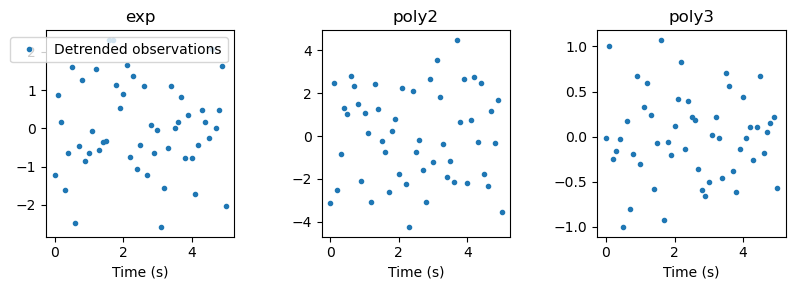

In [14]:
# plot:
fig,axs    = plt.subplots(1, 3, figsize=(8,3), tight_layout=True)
labels     = ['exp', 'poly2', 'poly3']
for ax,yd,label in zip(axs, [yd0,yd1,yd2], labels):
    ax.plot(t, yd, 'o', ms=3, label='Detrended observations')
    ax.set_title(label)
    ax.set_xlabel('Time (s)')
axs[0].legend()
plt.show()
